In [1]:
import pandas as pd 
import seaborn as sns

In [3]:
df=pd.read_csv('gym_data.csv', usecols=[1,2,3])
df.sample(5)

,Gender,Weight (kg),Height (m)
22,Female,71.0,1.68
892,Male,85.7,1.92
51,Male,84.2,1.76
234,Male,73.7,1.61
157,Female,67.1,1.75


In [19]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(df.drop('Gender', axis = 1), 
                                                     df['Gender'], 
                                                     test_size =(0.2))


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)
x_train_scaled=pd.DataFrame(x_train_scaled)
x_test_scaled = pd.DataFrame(x_test_scaled)

Text(0.5, 1.0, 'After Scaling')

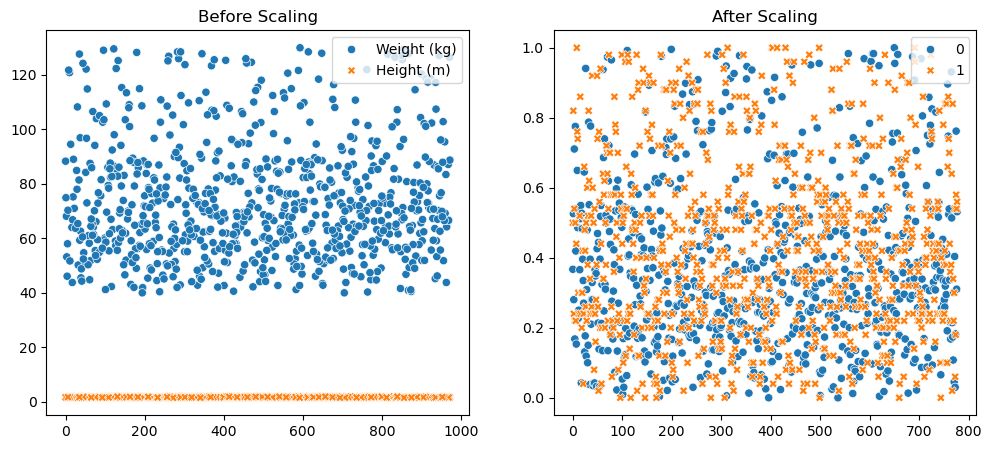

In [43]:

import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.scatterplot(x_train, ax=ax[0]) 
ax[0].set_title("Before Scaling")  

sns.scatterplot(x_train_scaled, ax=ax[1])  
ax[1].set_title("After Scaling")

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])


In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred= model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8256410256410256